In [1]:
# Import necessary libraries for data handling, statistics, and visualization
import pandas as pd  # Pandas is used for data manipulation
import numpy as np  # NumPy is used for numerical operations
import matplotlib.pyplot as plt  # Matplotlib is used for plotting graphs
import seaborn as sns  # Seaborn provides statistical visualizations

# Step 1: Load the dataset into a Pandas DataFrame
# 'pd.read_csv()' reads the CSV file and stores it in a structured format
file_path = 'C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/temp.csv'
df = pd.read_csv(file_path)

# Step 2: Display the first few rows of the dataset to understand its structure
print("Preview of the dataset:")
print(df.head())  # Prints the first five rows for quick inspection


Preview of the dataset:
              datetime    LA   NY
0  2013-01-01 00:00:00  11.7 -1.1
1  2013-01-01 01:00:00  10.7 -1.7
2  2013-01-01 02:00:00   9.9 -2.0
3  2013-01-01 03:00:00   9.3 -2.1
4  2013-01-01 04:00:00   8.8 -2.3


In [2]:
df

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3
...,...,...,...
35059,2016-12-31 19:00:00,13.5,4.6
35060,2016-12-31 20:00:00,13.2,5.7
35061,2016-12-31 21:00:00,12.8,5.8
35062,2016-12-31 22:00:00,12.3,5.7


In [3]:
# Step 1: Extract the 'NY' column from the DataFrame
# This selects only the column named 'NY' from the dataset
ny_data = df['NY']

# Step 2: Display the extracted data
print("Extracted 'NY' column data:")
print(ny_data)  # Prints the values of the 'NY' column for review


Extracted 'NY' column data:
0       -1.1
1       -1.7
2       -2.0
3       -2.1
4       -2.3
        ... 
35059    4.6
35060    5.7
35061    5.8
35062    5.7
35063    5.5
Name: NY, Length: 35064, dtype: float64


In [4]:
import numpy as np  # Importing NumPy for statistical calculations

# Step 1: Calculate the 25th percentile (Q1)
# Q1 represents the value below which 25% of the data falls
Q1 = np.percentile(ny_data, 25)

# Step 2: Calculate the 75th percentile (Q3)
# Q3 represents the value below which 75% of the data falls
Q3 = np.percentile(ny_data, 75)

# Step 3: Compute the Interquartile Range (IQR)
# IQR represents the middle 50% of the data range, useful for detecting outliers
IQR = Q3 - Q1

# Step 4: Display the calculated values
print("75th Percentile (Q3):", Q3)
print("25th Percentile (Q1):", Q1)
print("Interquartile Range (IQR):", IQR)


75th Percentile (Q3): 20.6
25th Percentile (Q1): 3.9
Interquartile Range (IQR): 16.700000000000003


In [5]:
# Step 1: Calculate the lower bound for outliers
# Any value below this threshold is considered a potential outlier
lower_bound = Q1 - 1.5 * IQR

# Step 2: Calculate the upper bound for outliers
# Any value above this threshold is considered a potential outlier
upper_bound = Q3 + 1.5 * IQR

# Step 3: Display the calculated bounds
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)


Lower Bound for Outliers: -21.150000000000006
Upper Bound for Outliers: 45.650000000000006


In [6]:
# Step 1: Identify outlier indices based on calculated lower and upper bounds
# This condition filters data where values fall outside the normal range
outlier_indices = ny_data[(ny_data < lower_bound) | (ny_data > upper_bound)].index

# Step 2: Display the row indices of outlier records
print("Row numbers of outlier records:")
print(outlier_indices)  # Prints the indices where outliers are present


Row numbers of outlier records:
Index([18749, 18750, 18751, 18752, 18753, 18754], dtype='int64')


In [7]:
# Step 1: Print outlier rows based on identified indices
# 'df.loc[outlier_indices]' retrieves the rows from the original DataFrame
# where NY temperature values exceed the upper bound or fall below the lower bound.

print("Outliers in NY Temperatures using the IQR method:")
print(df.loc[outlier_indices])  # Apply the row indices to the original DataFrame


Outliers in NY Temperatures using the IQR method:
                  datetime   LA    NY
18749  2015-02-21 05:00:00  9.3 -21.6
18750  2015-02-21 06:00:00  8.9 -21.6
18751  2015-02-21 07:00:00  6.9 -21.6
18752  2015-02-21 08:00:00  6.1 -22.4
18753  2015-02-21 09:00:00  5.6 -22.4
18754  2015-02-21 10:00:00  4.7 -22.4


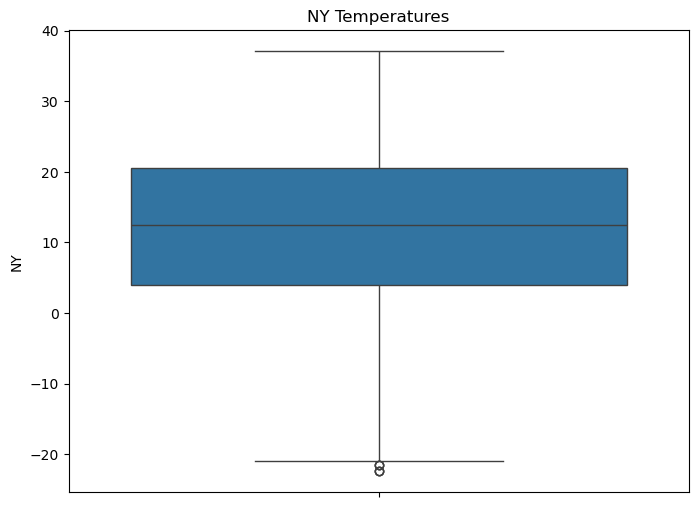

In [8]:
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical plotting

# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Sets the figure size for better readability

# Step 2: Generate a box plot for NY Temperatures
# A box plot helps visualize the distribution, median, and potential outliers in the dataset
sns.boxplot(y=ny_data)

# Step 3: Add a title for better understanding
plt.title('NY Temperatures')

# Step 4: Display the plot
plt.show()


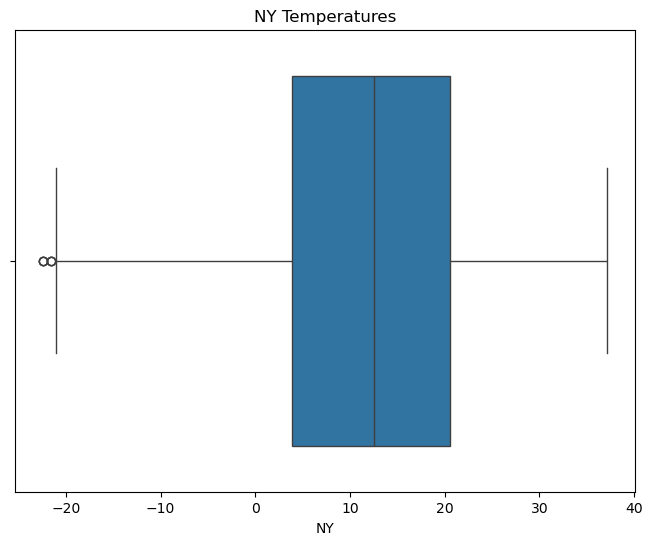

In [9]:
# Step 1: Create a figure with a specified size
plt.figure(figsize=(8,6))  # Adjusts figure size for better readability

# Step 2: Generate a box plot for NY Temperatures on the x-axis
# A box plot helps visualize distribution, median, and potential outliers
sns.boxplot(x=ny_data)

# Step 3: Add a title for better context
plt.title('NY Temperatures')

# Step 4: Display the plot
plt.show()
